In [1]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

File 'sp500sub.csv' already there; not retrieving.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name'], dtype='object')

In [5]:
df['Name'].unique()

array(['INCY', 'GILD', 'DXC', 'AFL', 'XYL', 'ARE', 'AMD', 'WYNN', 'IBM',
       'ATVI', 'AES', 'GPC', 'PRU', 'HST', 'WMB', 'GOOG', 'SRE', 'HSIC',
       'UNP', 'UPS', 'K', 'LYB', 'MDT', 'COF', 'HAS', 'CSX', 'GT', 'SYF',
       'EBAY', 'KSS', 'AJG', 'JWN', 'SBUX', 'IT', 'PH', 'DVN', 'MMM',
       'SPG', 'AKAM', 'IP', 'CPB', 'KMI', 'AAPL', 'NEM', 'KMX', 'TSCO',
       'SYY', 'VNO', 'NWS', 'NBL', 'ACN', 'APH', 'PDCO', 'WLTW', 'FIS',
       'URI', 'CBOE', 'FISV', 'BA', 'UAA', 'CVS', 'WU', 'SLB', 'AIV',
       'VLO', 'MU', 'CAH', 'AZO', 'CCI', 'ZTS', 'MCO', 'ALLE', 'RHI',
       'UAL', 'IR', 'CB', 'VMC', 'GD', 'AAP', 'NEE', 'ABT', 'WFC', 'DIS',
       'SNA', 'MAR', 'JPM', 'CLX', 'KIM', 'SCG', 'HBI', 'ABBV', 'RSG',
       'ETR', 'ADBE', 'COO', 'HLT', 'INTU', 'SLG', 'GWW', 'COG', 'CBS',
       'FB', 'CMS', 'MDLZ'], dtype=object)

In [6]:
df.head()


,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [7]:
# names = df['Name'].unique()
names = ['GOOG', 'SBUX', 'KSS', 'NEM']

In [8]:
252/2

126.0

In [9]:
all_dates = df.index.unique().sort_values()

In [10]:
len(all_dates)

2267

In [11]:
all_dates.get_loc('2014-01-02')

1007

In [12]:
all_dates.get_loc('2014-06-30')

1130

In [13]:
start = all_dates.get_loc('2014-01-02')
end = all_dates.get_loc('2014-06-30')
dates = all_dates[start:end+1]

In [14]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [15]:
len(dates)

124

In [16]:
close_prices = pd.DataFrame(index=dates)

In [17]:
tmp1 = df.loc[dates]
for name in names:
  df_sym = tmp1[tmp1['Name'] == name]
  df_tmp = pd.DataFrame(data=df_sym['Close'].to_numpy(), \
                        index=df_sym.index, columns=[name])
  close_prices = close_prices.join(df_tmp) # left-join by default

In [18]:
close_prices.head()

,GOOG,SBUX,KSS,NEM
Date,,,,
2014-01-02,554.481689,38.584999,56.990002,23.959999
2014-01-03,550.436829,38.474998,56.860001,23.920000
2014-01-06,556.573853,38.084999,56.040001,24.080000
2014-01-07,567.303589,38.605000,56.099998,23.950001
2014-01-08,568.484192,39.014999,55.180000,23.400000


In [19]:
close_prices.isna().sum().sum()

0

In [20]:
close_prices.fillna(method='ffill', inplace=True)

In [21]:
close_prices.isna().sum().sum()

0

In [22]:
# empty dataframe
returns = pd.DataFrame(index=dates[1:])

In [23]:
for name in names:
  current_returns = close_prices[name].pct_change()
  returns[name] = current_returns.iloc[1:] * 100

In [24]:
returns.head()

,GOOG,SBUX,KSS,NEM
Date,,,,
2014-01-03,-0.729485,-0.285086,-0.228112,-0.166941
2014-01-06,1.114937,-1.013644,-1.442138,0.668896
2014-01-07,1.927819,1.365368,0.107062,-0.539864
2014-01-08,0.208108,1.062038,-1.639925,-2.296456
2014-01-09,-0.962997,-0.551071,0.688657,-0.854696


In [25]:
mean_return = returns.mean()

In [26]:
mean_return

GOOG    0.038691
SBUX    0.009955
KSS    -0.053793
NEM     0.072932
dtype: float64

In [27]:
cov = returns.cov()

In [28]:
cov

,GOOG,SBUX,KSS,NEM
GOOG,2.206565,0.832469,0.771772,-0.033600
SBUX,0.832469,1.558406,0.714586,0.374448
KSS,0.771772,0.714586,2.025854,0.180308
NEM,-0.033600,0.374448,0.180308,4.815104


In [29]:
cov_np = cov.to_numpy()

In [30]:
N = 10000
D = len(mean_return)
returns = np.zeros(N)
risks = np.zeros(N)
random_weights = []
for i in range(N):
  rand_range = 1.0
  w = np.random.random(D)*rand_range - rand_range / 2 # with short-selling
  w[-1] = 1 - w[:-1].sum()
  np.random.shuffle(w)
  random_weights.append(w)
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov_np).dot(w))
  returns[i] = ret
  risks[i] = risk

In [31]:
single_asset_returns = np.zeros(D)
single_asset_risks = np.zeros(D)
for i in range(D):
  ret = mean_return[i]
  risk = np.sqrt(cov_np[i,i])

  single_asset_returns[i] = ret
  single_asset_risks[i] = risk

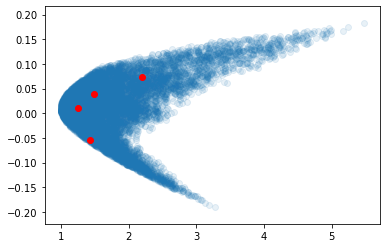

In [32]:
plt.scatter(risks, returns, alpha=0.1);
plt.scatter(single_asset_risks, single_asset_returns, c='red');

In [33]:
for idx, val in cov['GOOG'].iteritems():
  print(idx, val)

GOOG 2.206564778839878
SBUX 0.832469000715239
KSS 0.7717715673917704
NEM -0.03360028033416102


## Max and Min Return

In [34]:
from scipy.optimize import linprog

In [35]:
D = len(mean_return)

In [36]:
A_eq = np.ones((1, D))
b_eq = np.ones(1)

In [37]:
### NOTE: The bounds are by default (0, None) unless otherwise specified.
# bounds = None
bounds = [(-0.5, None)]*D
bounds

[(-0.5, None), (-0.5, None), (-0.5, None), (-0.5, None)]

In [38]:
# minimize
res = linprog(mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
res

     con: array([-3.40736328e-11])
     fun: -0.19527252346171214
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([-0.5, -0.5,  2.5, -0.5])

In [39]:
min_return = res.fun

In [40]:
# maximize
res = linprog(-mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
res

     con: array([-1.9021229e-11])
     fun: -0.18490322421785943
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([-0.5, -0.5, -0.5,  2.5])

In [41]:
max_return = -res.fun

In [42]:
min_return, max_return

(-0.19527252346171214, 0.18490322421785943)

## Mean-Variance Optimal Portfolios

In [43]:
N = 100
target_returns = np.linspace(min_return, max_return, num=N)

In [44]:
from scipy.optimize import minimize

In [45]:
def get_portfolio_variance(weights):
  return weights.dot(cov).dot(weights)

In [46]:
def target_return_constraint(weights, target):
  return weights.dot(mean_return) - target

In [47]:
def portfolio_constraint(weights):
  return weights.sum() - 1

In [48]:
constraints = [
    {
        'type': 'eq',
        'fun': target_return_constraint,
        'args': [target_returns[0]], # will be updated in loop
    },
    {
        'type': 'eq',
        'fun': portfolio_constraint,
    }
]

In [49]:
# check if it works
res = minimize(
    fun=get_portfolio_variance,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints=constraints,
)
res

     fun: 10.284419890082773
     jac: array([-0.60498881,  1.99568558,  7.76491141, -3.70373189])
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([-1.04022885,  0.2801814 ,  2.25825339, -0.49820594])

In [50]:
# Let's limit the magnitude of the weights
res = minimize(
    fun=get_portfolio_variance,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints=constraints,
    bounds=bounds,
)
res

     fun: 11.22659930613381
     jac: array([ 0.85342419,  0.80760777,  8.46260381, -4.25440991])
 message: 'Optimization terminated successfully.'
    nfev: 19
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([-0.5, -0.5,  2.5, -0.5])

In [52]:
bounds

[(-0.5, None), (-0.5, None), (-0.5, None), (-0.5, None)]

In [53]:
optimized_risks = []
for target in target_returns:
  # set target return constraint
  constraints[0]['args'] = [target]

  res = minimize(
      fun=get_portfolio_variance,
      x0=np.ones(D) / D, # uniform
      method='SLSQP',
      constraints=constraints,
      bounds=bounds,
  )
  optimized_risks.append(np.sqrt(res.fun))
  if res.status != 0:
    print(res)

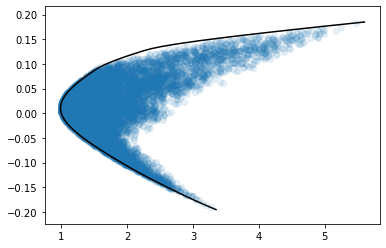

In [54]:
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black');

In [55]:
# Min variance portfolio
# Let's limit the magnitude of the weights
res = minimize(
    fun=get_portfolio_variance,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints={
        'type': 'eq',
        'fun': portfolio_constraint,
    },
    bounds=bounds,
)
res

     fun: 0.9782928256403259
     jac: array([1.95658569, 1.95658568, 1.95658568, 1.95658569])
 message: 'Optimization terminated successfully.'
    nfev: 27
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.2234007 , 0.34897125, 0.25976249, 0.16786556])

In [56]:
mv_risk = np.sqrt(res.fun)
mv_weights = res.x
mv_ret = mv_weights.dot(mean_return)

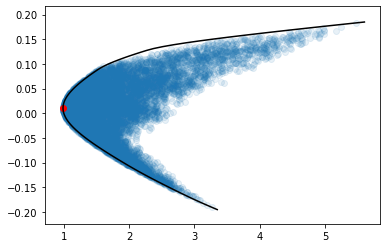

In [57]:
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black');
plt.scatter([mv_risk], [mv_ret], c='red');

## Sharpe Ratio

In [58]:
# https://fred.stlouisfed.org/series/TB3MS
risk_free_rate = 0.03 / 252

In [59]:
def neg_sharpe_ratio(weights):
  mean = weights.dot(mean_return)
  sd = np.sqrt(weights.dot(cov).dot(weights))
  return -(mean - risk_free_rate) / sd

In [60]:
res = minimize(
    fun=neg_sharpe_ratio,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints={
        'type': 'eq',
        'fun': portfolio_constraint,
    },
    bounds=bounds,
)
res

     fun: -0.05920759738026762
     jac: array([0.00937157, 0.00929031, 0.02811907, 0.00926263])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([ 0.84222832,  0.11832916, -0.5       ,  0.53944252])

In [61]:
best_sr, best_w = -res.fun, res.x

In [62]:
mc_best_w = None
mc_best_sr = float('-inf')
for i, (risk, ret) in enumerate(zip(risks, returns)):
  sr = (ret - risk_free_rate) / risk
  if sr > mc_best_sr:
    mc_best_sr = sr
    mc_best_w = random_weights[i]
print(mc_best_w, mc_best_sr)

[ 0.78750814  0.22924896 -0.49982451  0.48306742] 0.05899354062546122


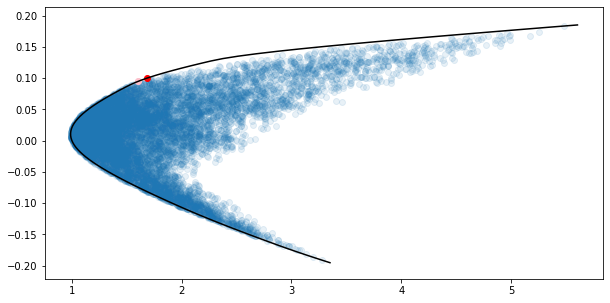

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black');

# found by optimization
opt_risk = np.sqrt(best_w.dot(cov).dot(best_w))
opt_ret = mean_return.dot(best_w)
plt.scatter([opt_risk], [opt_ret], c='red');

# found by monte carlo simulation
mc_risk = np.sqrt(mc_best_w.dot(cov).dot(mc_best_w))
mc_ret = mean_return.dot(mc_best_w)
plt.scatter([mc_risk], [mc_ret], c='pink');

## Risk-free asset with tangency portfolio

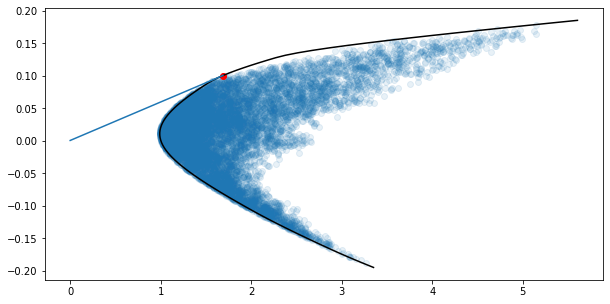

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black');

# found by optimization
opt_risk = np.sqrt(best_w.dot(cov).dot(best_w))
opt_ret = mean_return.dot(best_w)
plt.scatter([opt_risk], [opt_ret], c='red');

# tangent line
x1 = 0
y1 = risk_free_rate
x2 = opt_risk
y2 = opt_ret
plt.plot([x1, x2], [y1, y2]);